# Self-Organizing Maps of Clothing Item Images

This is an exercise to gain familiarity with the applications and functions of self-organizing maps (SOMs). The scikit-learn package for SOMs is applied the MNIST database of images of clothing (shown below) to visualize a reduction in dimensionality from 784 features to 2. The goal of this exercise is to explore the visualization and predictive power of the SOM algorithm.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn_som.som import SOM
from sklearn.datasets import fetch_openml

Now let's apply this same method to the Fashion MNIST data set. This data set is similar to the last data set of handwritten digits, except it uses images of ten separate pieces of clothing labeled as such:

- 0: T-shirt/top
- 1: Trouser
- 2: Pullover
- 3: Dress
- 4: Coat
- 5: Sandal
- 6: Shirt
- 7: Sneaker
- 8: Bag
- 9: Ankle boot

Let's start by importing the data and inspecting it

In [2]:
# import the fashion MNIST data and explore it
from scipy.io import arff
arff_file = arff.loadarff('Fashion_MNIST.arff')
data = pd.DataFrame(arff_file[0])
data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'9'
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,114.0,130.0,76.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0'
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0'
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,96.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'3'
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'9'
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'1'
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'8'
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'1'


So we see that the data is made of 70,000 data points, each structured as an array of 784 dimensions and 1 label. Each of the 784 dimensions represents a pixel value of a 28x28 pixel image. Let's split the data to separate the labels from the features, then separate them into training and testing data.

In [3]:
# assign all but last column of 6000 data points to training data set
train = np.array(data[data.columns[:784]][:10000])
# assign all but last column of 6000 data points to testing data set
test = np.array(data[data.columns[:784]][10000:12000])
# assign last column of 6000 data points to training target data set
# convert bits to integers
train_target = []
for i in range(10000):
    train_target.append(int(data['class'][i]))
train_target = np.array(train_target)
# assign last column of 6000 data points to testing target data set
# convert bits to integers
test_target = []
for i in range(10000, 12000):
    test_target.append(int(data['class'][i]))
test_target = np.array(test_target)
print("Training data set length:", len(train))
print("Testing data set length:", len(test))
print("Training target data set length:", len(train_target))
print("Testing target data set length:", len(test_target))

Training data set length: 10000
Testing data set length: 2000
Training target data set length: 10000
Testing target data set length: 2000


We will also define an array with each index corresponding to the labels represented by the index numbers.

In [4]:
target_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress',
                 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


Now let's visualize the first image of each clothing type, to see what we're actually working with.

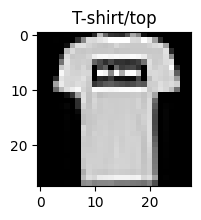

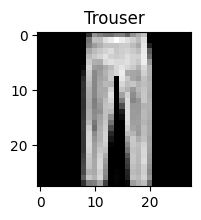

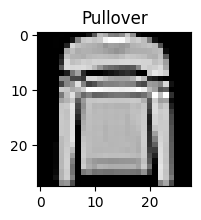

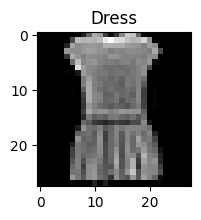

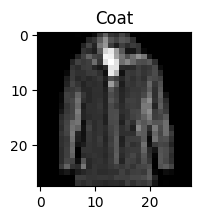

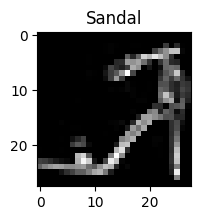

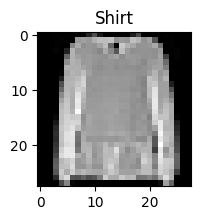

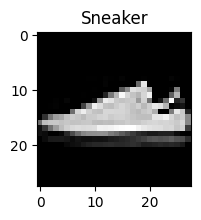

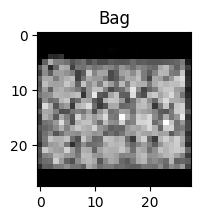

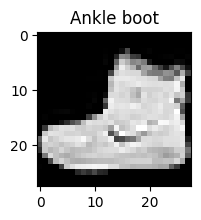

In [76]:
for i in range(10):
    display = train[train_target == i][0].reshape(28, 28)
    fig, ax = plt.subplots(figsize=(2, 2))
    ax.imshow(display, cmap='gray')
    plt.title(target_labels[i])
    plt.show()

Now let's recreate the self-organizing map with the new data.

In [6]:
digit_som = SOM(m=10, n=10, dim=784)
digit_som.fit(train)

In [7]:
digit_map = digit_som.transform(train)

In [22]:
digit_prediction = digit_som.predict(train)

In [24]:
# find the target values for each of the 100 predicted values
class_labels = []
for i in range(100):
    som_predicition_list = {}
    # if a node has no closest images, assign an 11th label
    if len(train_target[digit_prediction == i]) == 0:
        class_labels.append(10)
        continue
    for j in train_target[digit_prediction == i]:
        if j not in som_predicition_list:
            som_predicition_list[j] = 0
        som_predicition_list[j] += 1
    # assign the predicted label by finding the mode of the predicted values
    class_labels.append(int(max(som_predicition_list, key=som_predicition_list.get)))

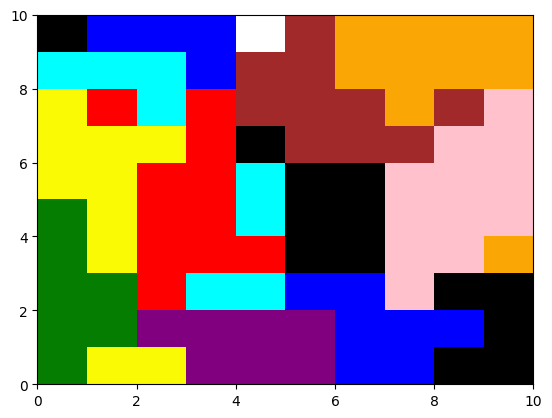

In [42]:
# create grid coordinates and colors to represent each of the 10 labels
# nodes with no matching images are represented as white
x, y = np.meshgrid(np.arange(11), np.arange(11))
z = np.array(class_labels).reshape(10, 10)
custom_colors = ['red', 'green', 'blue', 'yellow',
                 'purple', 'orange', 'cyan', 'brown',
                 'black', 'pink', 'white']

# assign the colors to the predicted labels and plot
fig, ax = plt.subplots()
cmap = colors.LinearSegmentedColormap.from_list("", custom_colors)
ax.pcolormesh(x, y, np.flipud(z), cmap=cmap)

The clothing items are represented in the map by colors from the custom color map in order:

- Red: T-shirt/top
- Green: Trouser
- Blue: Pullover
- Yellow: Dress
- Purple: Coat
- Orange: Sandal
- Cyan: Shirt
- Brown: Sneaker
- Black: Bag
- Pink: Ankle boot
- White: Empty nodes

To get a better visualization of these categories, let's inspect the images assigned to each node and take an average of the images by pixel value. Then we can create a grid similar to the one above, but with representations of the data at each node.

In [35]:
# for each node, create an average of all the images closest to it
node_image = []
for i in range(100):
    # create a node image variable for each node
    node_image.append([0]*len(train[0]))
    # find all images closest to the node
    for img in train[digit_prediction == i]:
        # add each pixel of each image together
        for j, pixel in enumerate(img):
            node_image[i][j] += pixel
    # skip empty nodes
    if not len(train[digit_prediction == i]):
        node_image[i] = np.array(node_image[i])
        continue
    # average out each pixel and make image a NumPy array
    node_image[i] = np.array(node_image[i]) / len(train[digit_prediction == i])

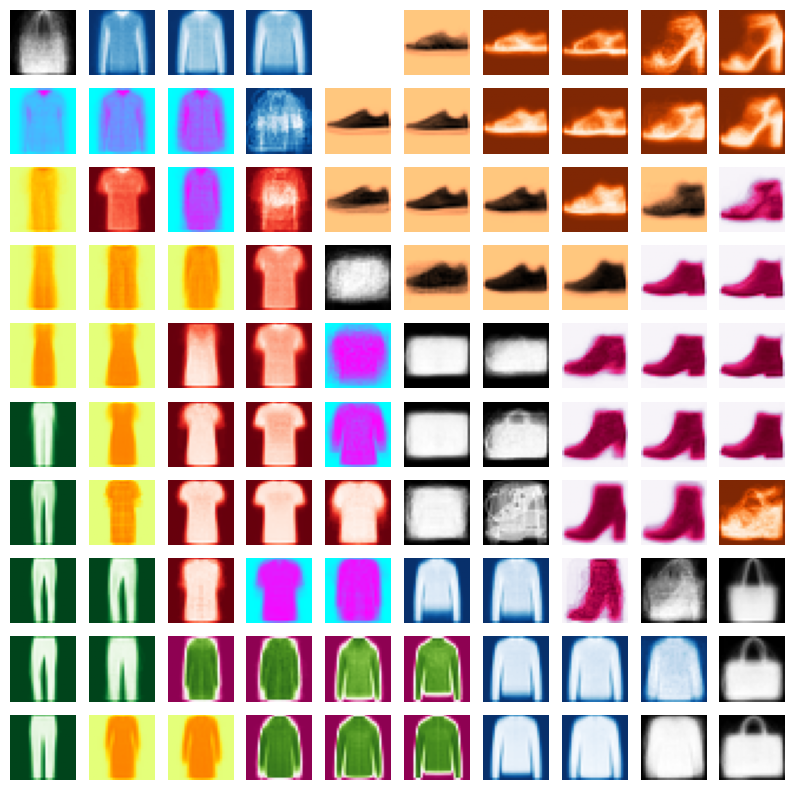

In [51]:
# redefine colors to most similar cmap gradients
gradient_colors = ['Reds_r', 'Greens_r', 'Blues_r', 'Wistia',
                 'PiYG', 'Oranges_r', 'cool', 'copper_r',
                 'Grays_r', 'PuRd', 'Grays']

plt.figure(figsize=(10,10))
# plot average images for each of the 100 nodes
for i in range(100):
    plt.subplot(10,10,i+1)    # the number of images in the grid is 10*10 (100)
    plt.imshow(node_image[i].reshape(28, 28), cmap=gradient_colors[z.reshape(100)[i]])
    plt.axis('off')

plt.show()

The clothing items are represented in the map by colors from the custom color map in order:

- Red/white: T-shirt/top
- Green/white: Trouser
- Blue/white: Pullover
- Yellow: Dress
- Purple/green: Coat
- Orange/white: Sandal
- Cyan/magenta: Shirt
- Brown/black: Sneaker
- Black/white: Bag
- Pink: Ankle boot
- White: Empty cells

Since we assigned labels for each class created by the SOM, we can measure the accuracy of the labels by comparing the class assigned to each data point (and associated label) to their actual labels. We'll start by assessing the accuracy of the representation of the test data.

In [46]:
count = 0
for i in range(len(digit_prediction)):
    if int(train_target[i]) == class_labels[digit_prediction[i]]:
        count += 1
print("{}% of training data accurately represented".format(count*100 / len(digit_prediction)))

70.86% of training data accurately represented


Now we will use the test data to assess the accuracy of the self-organization.

In [45]:
# make predictions on test data
digit_prediction_test = digit_som.predict(test)

# count accurate predictions
count = 0
for i in range(len(digit_prediction_test)):
    if int(test_target[i]) == class_labels[digit_prediction_test[i]]:
        count += 1
print("{}% of test data accurately represented".format(count*100 / len(digit_prediction_test)))

69.1% of test data accurately represented


So the colors (and associated label) that we assigned to each category created by the self-organizing map represents the labels of the data fairly accurately.